# Summary    
- complicated periodograms
- best suggestion of ~28 day period from periodograms by year, esp. with detrending
- no clear drift in rolling search, but several results in a row ~a day below established period
- search for established period fairly inconclusive, esp. with various periodogram methods
    - decent evidence in LC with lines
- no constant superorbital trend or clear pattern found
    - some ~1000 day periodicity but discontinuous thanks to secondary peak
    - otherwise, peaks spaced by ~1000 days but hard to tell centers of flares to see if that value is otherwise constant
- interesting shape in V-I vs. time: "flare" with width of three I band flares, but could be a sampling effect
- multiple components in color-mag diagrams; separated in time
    - interesting one to use arrows for
    - looks like a turnover transition
- final peak has lower amplitude and then trails off into the longest time at the faintest values

# Outline
- 1: Sequence of Three Auto Functions that Inform Further Search
- 2: Look for Orbital Period with Periodograms
- 3: Look for Orbital Period with LC
- 4: Look for Super-Orbital Period with Periodograms
- 5: Look for Super-Orbital Period with LC

In [1]:
from uncertainties import ufloat
from uncertainties.umath import *
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import LombScargle
from scipy import signal
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.optimize
# from lmfit.models import GaussianModel
import glob
from astropy.table import Table,join,vstack,unique
from importlib import reload
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import ogle as o #module

blue = 'cornflowerblue'
navy = 'navy'
purple = 'rebeccapurple'
pink = '#CF6275'
maroon = 'maroon'

In [2]:
#change src number here
num = 11
cross = Table.read('sourcefiles.csv')
full = Table.read('smc_x_m03_zar_match_OGLE_v2.ascii',format='ascii')
orb = float(cross[cross['src_n']==num]['Porb'])
orb

28.51

In [3]:
full[full['src_n']==num]

src_n,OGLE,RA_OGLE,DEC_OGLE,ra_deg,dec_deg,perr,period,Porb,_RAJ2000_1,_DEJ2000_1,__M2002_,Vmag_1,Separation_1,_RAJ2000_2,_DEJ2000_2,Vmag_2,recno,Separation
int64,str38,str11,str11,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64
11,SMC719.12 \#35646,00:51:53.16,-72:31:48.6,12.971667,-72.53,1.0,8.9,28.51,12.971541666666669,-72.5301388888889,21514,14.45,0.522346798389768,12.97158,-72.53009999999999,14.381,2282823,0.3764079443112099


- spin period: 8.9 seconds

# 1: Sequence of Three Auto Functions that Inform Further Search

orbital period: 28.51


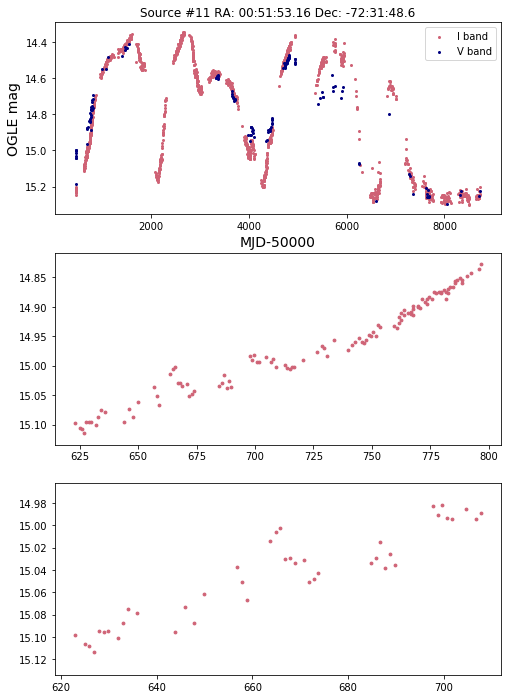

In [4]:
ilist,vlist = o.getIV(num,cross,plot=True,zooms=True,figsize=(8,12),mult=(3,8),offset=31,stack=False) #sometimes good to adjust offset
iband,vband = vstack(ilist),vstack(vlist)

In [5]:
idays = iband['MJD-50000']
imag = iband['I mag']
ierr = iband['I mag err']

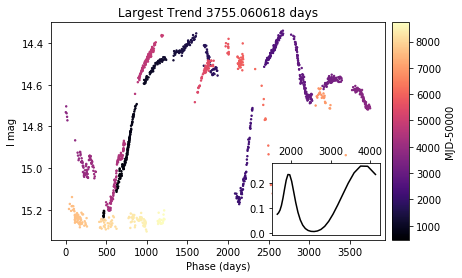

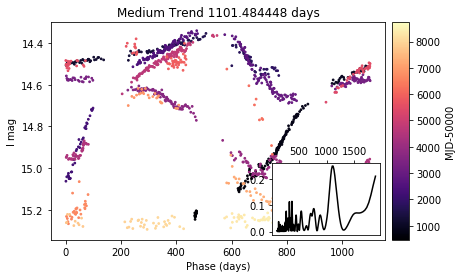

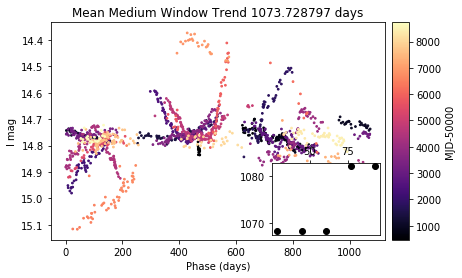

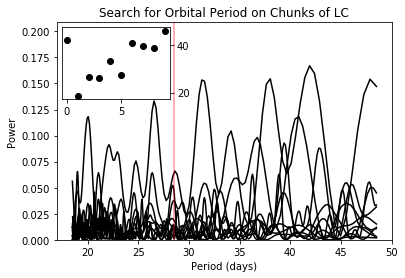

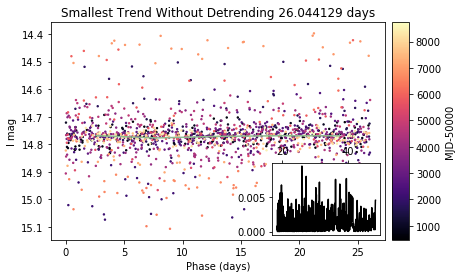

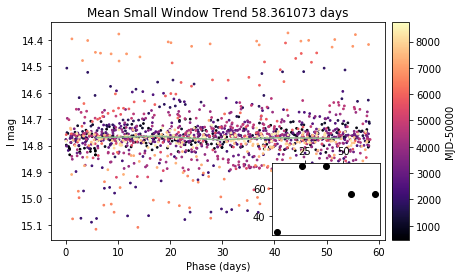

In [6]:
o.autopd(iband,orb,plotpd=True,plotphase=True,printall=False,ctime=True,orb_bounds=(10,20),cutlc=True,numcuts=10,plotdet=True,pbins=5,saveall=False,srcnum=num)

interesting upward trend of period in orbital chunks -- keep an eye out for more evidence of drift

I and V-I correlation: -0.6772792774073827
V and V-I correlation: -0.42451937262899136


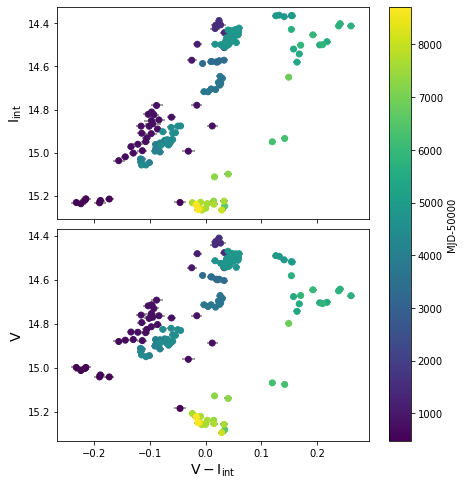

In [7]:
reload(o)
interp = o.colormag(iband,vband,ctime=True,retint=True) 

(15.334, 14.311)

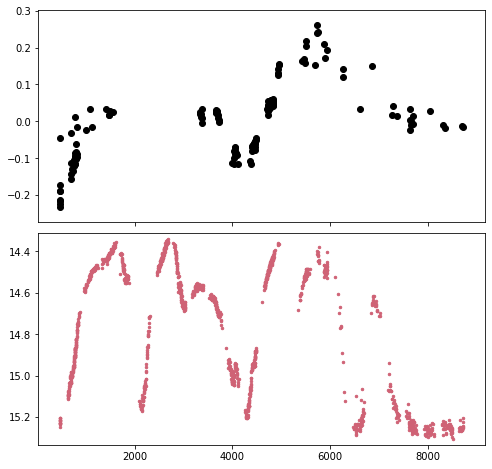

In [8]:
#V-I vs time over I mag lc
fig,ax = plt.subplots(2,1,figsize=(8,8),sharex=True)
ax[0].scatter(vband['MJD-50000'],vband['V mag']-interp,color='black')
# plt.colorbar(label=('I mag'))
ax[1].scatter(idays,imag,color=pink,s=6)
plt.subplots_adjust(hspace=0.05)
maxi,mini = np.max(imag),np.min(imag)
ax[1].set_ylim(maxi+.03,mini-.03)

# 2: Look for Orbital Period with Periodograms

first look for low periods and use for aliases

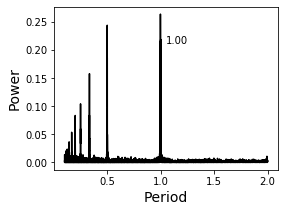

In [9]:
freq,power,bp = o.periodogram(iband,minp=0.1,maxp=2,more=True)
pf = o.findpeaks(freq,power,pkorder=True)

In [10]:
#find aliases using top ten periods above
alias = o.aliasarr(pf['period'],nrange=4)
alias[alias>2]

array([   87.11221255,   136.69850169,   125.86813267,   120.19124022,
         218.35648652,   191.52591737,   109.66119816,   178.68385084,
          99.13371135,   179.33021669,   218.16411719,   191.82227898,
         156.85716109,   136.62308382,   114.47308533,    87.17346998,
         166.33176743,   123.17805525,   403.63975257,   353.04049067,
         539.94476848,   219.12843833,   275.37147916,   185.64361316,
         305.96835551,   448.97561516,   173.55336769,   156.75786775,
         114.57888964,   240.84964997,   682.74055121,   201.49125414,
         376.64764659,   545.89035056, 11265.38667977,   275.0656058 ,
         448.16307426,  1121.41878838,   306.72540036,  1906.42125668,
        1111.36522577,  1891.85682486,   698.12473253,   781.80974156,
         247.83409993,   221.67612892])

by OGLE epoch then dense regions (but can be broken up by >20 days)

In [11]:
len(ilist)

3

In [44]:
orb

28.51

start ind: 0, end ind: -1
start ind: 0, end ind: -1
start ind: 0, end ind: -1


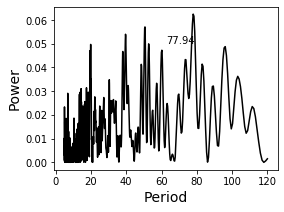

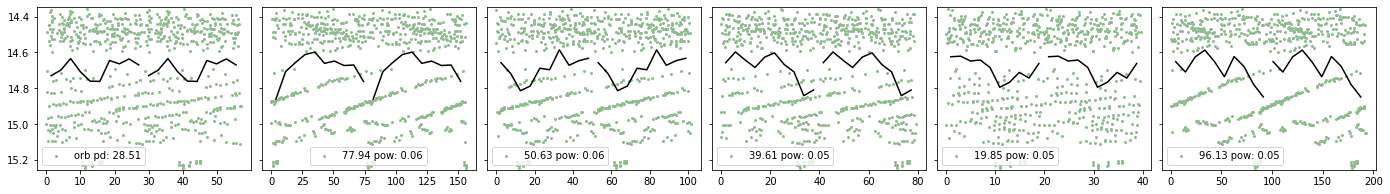

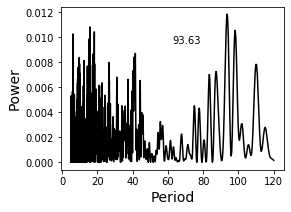

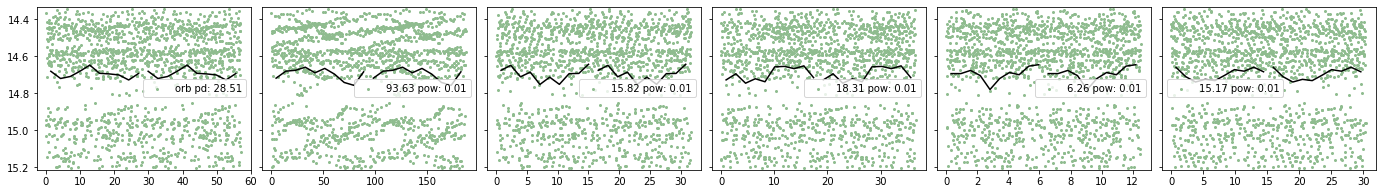

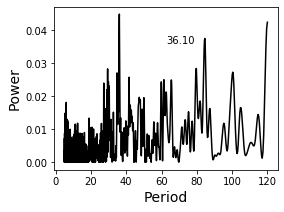

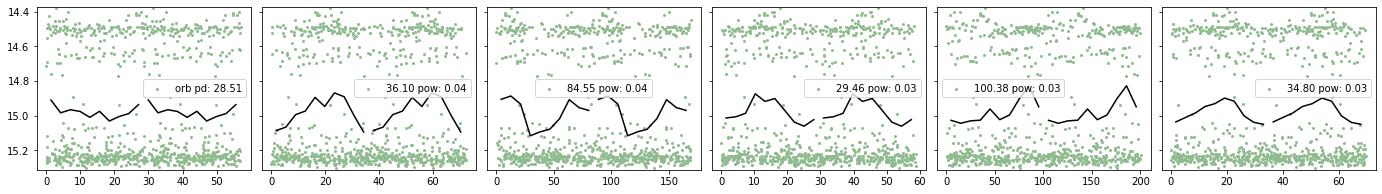

In [12]:
#without detrending
#always get high peak at exactly one day b/c of observing
for i in ilist:
    df,pks = o.multiphase(i,orb=orb,dense=False,minp=5,maxp=120,plotpd=True)

#### both with and without detrending, complicated periodograms with many peaks; orbital period not immediately jumping out

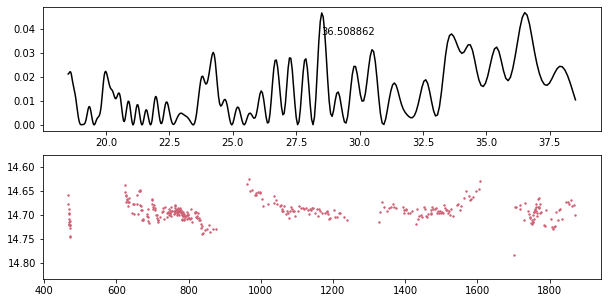

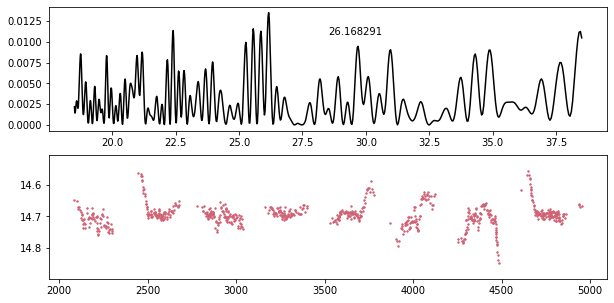

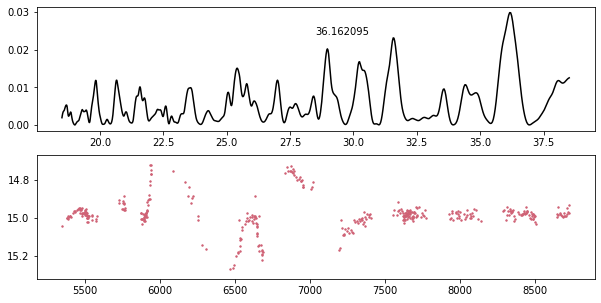

In [13]:
#detrending each OGLE epoch
#varies just a bit based on window
for i in ilist:
    o.knownorb(i,orb,lower=10,upper=10,window=41,cutdata=False,cut1=0,cut2=500,plotdet=True,figsize=(10,5))


- complicated periodograms with and without detrending
- larger search at low periods

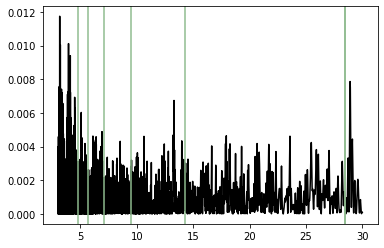

In [14]:
o.detrend(iband,window=51)
freq,power,bp = o.periodogram(iband,minp=3,maxp=30,det=True,more=True,plot=False)
pf = o.findpeaks(freq,power,sigma=10,distance=50,pkorder=True)
plt.plot(1/freq,power,color='black')
plt.axvline(orb,color='darkseagreen')
for i in range(1,7):
    plt.axvline(orb/i,color='darkseagreen')


**separate into regions**

start ind: 15, end ind: 157


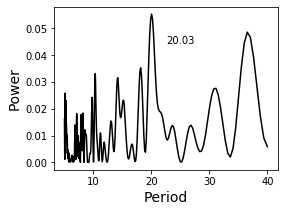

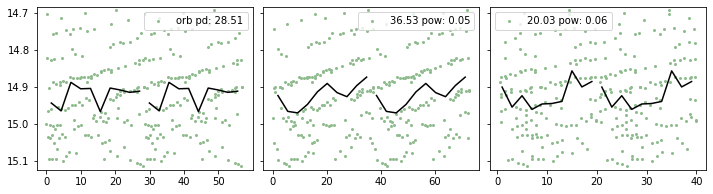

In [15]:
#search and fold with densest region (max space up to 50 points); search closer to established period
df,pks = o.multiphase(iband,orb=orb,dense=True,maxspace=50,minp=5,maxp=40,plotpd=True)

In [16]:
dense,mdense = o.finddense(iband,maxspace=50,retall=True)

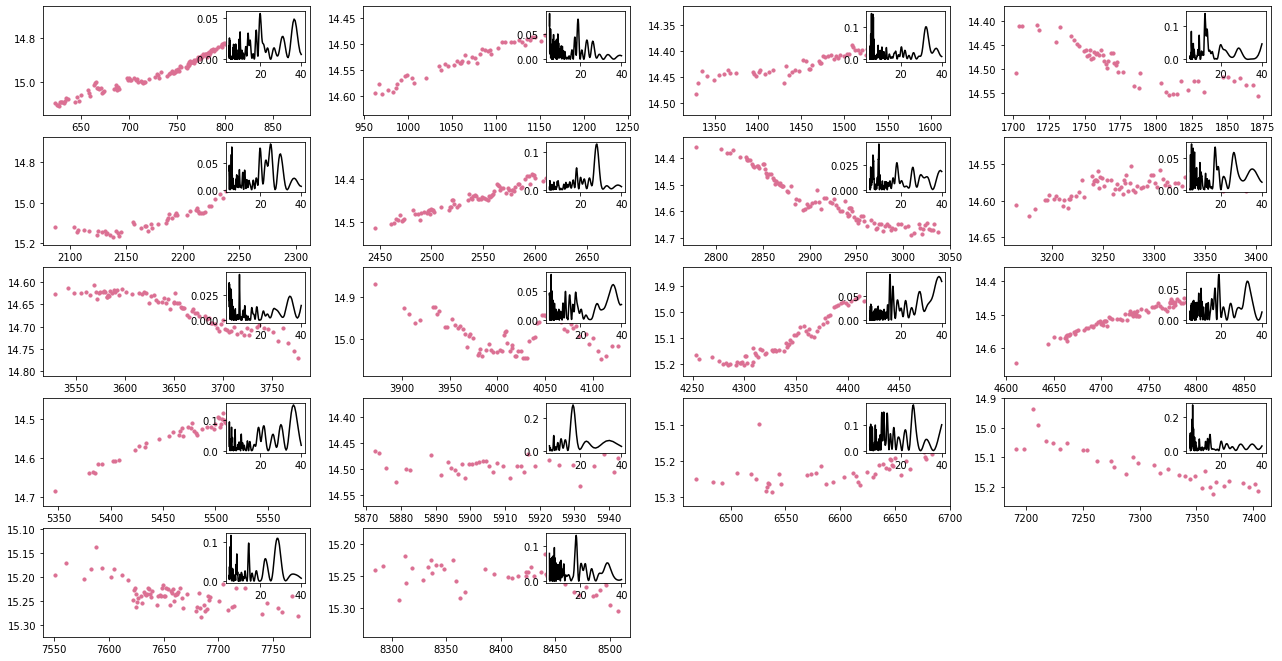

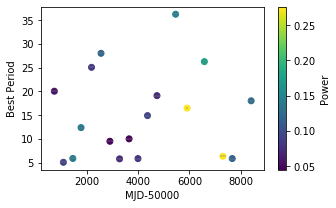

In [17]:
bps,maxpows,stdate,endate = o.denselcpd(iband,dense,maxp=40,plotbest=True,onlybp=True)

In [18]:
orb

28.51

In [19]:
bps

[20.02509030967788,
 5.048466378500005,
 5.856369370638034,
 12.356163480702383,
 25.05827738747715,
 28.010533585507776,
 9.478641807957475,
 5.775717190750308,
 9.988306028154291,
 5.832725830839984,
 14.884906198057914,
 19.091009647538815,
 36.24452566266225,
 16.462769721212624,
 26.258258150111576,
 6.312273010008529,
 5.84075557243925,
 18.00362252841482]

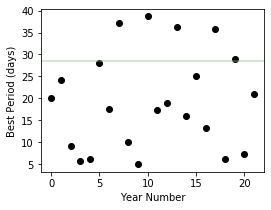

In [20]:
years,bps = o.yrpd(iband,minp=5,maxp=40,orb=orb,plotbest=True,det=False)

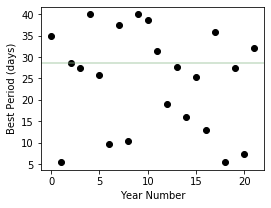

In [21]:
# repeat with detrending
years, bps = o.yrpd(iband,minp=5,maxp=40,orb=orb,plotbest=True,det=True,window=51)

closest is 28.64

In [22]:
bps

[34.98737299979313,
 5.408564402541199,
 28.641368763743817,
 27.532414608839755,
 40.0,
 25.688642316917214,
 9.635936135004357,
 37.53178857064359,
 10.3952244732427,
 40.0,
 38.71315491065314,
 31.52219403498922,
 19.032244070463225,
 27.753614604843268,
 16.009464883506936,
 25.251459570694003,
 13.053462863469733,
 35.80065411111237,
 5.446833192886744,
 27.54908699497663,
 7.278712439066663,
 32.14324138745804]

#### rolling search

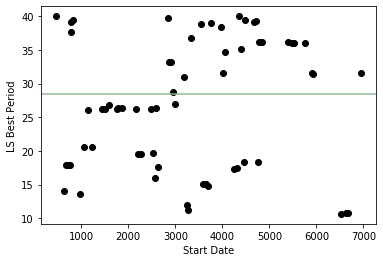

In [23]:
ps,pows,bps,st = o.rollpd(iband,npoint=200,nroll=20,det=False,minp=10,maxp=40,plot=False)
plt.scatter(st,bps,color='black')
plt.ylabel('LS Best Period')
plt.xlabel('Start Date')
plt.axhline(orb,color='darkseagreen') #many points below established period

# 3: Look for Orbital Period with LC


In [24]:
orb

28.51

In [25]:
#identify reliable flare center to use for cen

def checkorb(st,end,cen=1225,orb=orb,plcen=False,figsize=(10,4)):
    stday = idays[st:st+1]
    enday = idays[end-1:end]
    fig = plt.figure(figsize=figsize)
    plt.errorbar(idays[st:end],imag[st:end],yerr=ierr[st:end],linestyle='none',marker='o',color=pink,markersize=5)
    maxi,mini = np.max(imag[st:end]),np.min(imag[st:end])
    plt.ylim(maxi+.02,mini-.02)

    fline = int((stday - cen)/orb)
    lline = int((enday - cen)/orb)
    for i in range(fline-1,lline+2):
        plt.axvline(cen+orb*i,alpha=0.2)
    if plcen: plt.axvline(cen,alpha=0.6)


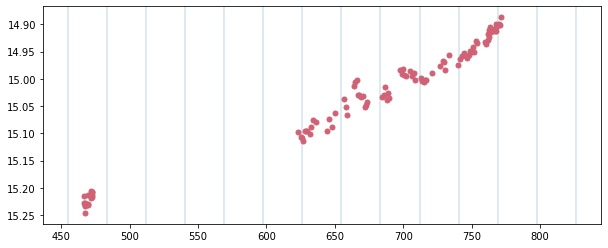

In [26]:
checkorb(0,100,plcen=False)

just other features w/ sim amplitude? or somehow not showing up as constant? 

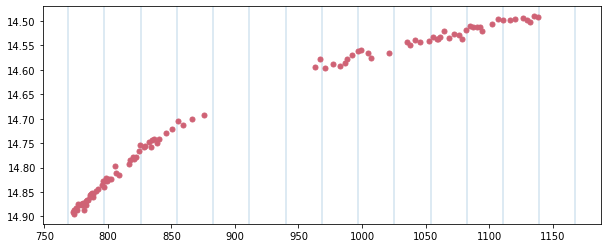

In [27]:
checkorb(100,200)

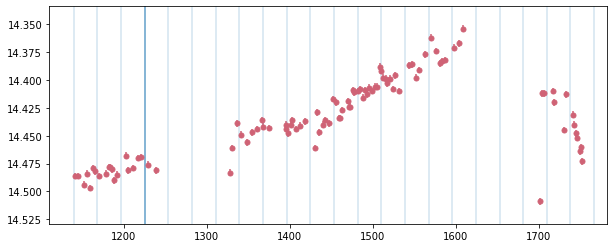

In [45]:
checkorb(200,300,plcen=True) #successful here

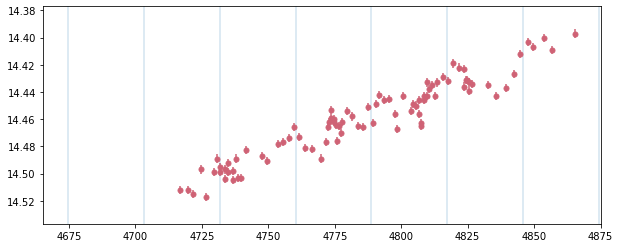

In [29]:
checkorb(1000,1090)

In [30]:
def orbsub(inds,cen=1225,cenerr=0.4,pd=orb,pderr=0.5,span=True,plcen=False,figsize=(22,30)):
    '''Separate full LC into subplots to better see orbital period timescale
    st,end are lists or arrays of start and end indices of each subplot
    cen: center of flare from which vertical lines are spaced (identify manually)
    add table/columns as arguments if moving to ogle.py'''
    sts = inds[:-1]
    ends = inds[1:]
    
    fig = plt.figure(figsize=figsize)
    rows = int(len(sts)/2)
    if len(sts)%2 == 1: rows+=1
    
    for i in range(len(sts)):
        st,end = sts[i],ends[i]
        #start at 1 for adding subplot
        ax = fig.add_subplot(rows,2,i+1)    
        tot = idays[end-1:end] - idays[st:st+1]
        stday = idays[st:st+1]
        enday = idays[end-1:end] 
    
        ax.errorbar(idays[st:end],imag[st:end],yerr=ierr[st:end],linestyle='none',marker='o',color=pink,markersize=5)
        maxi,mini = np.max(imag[st:end]),np.min(imag[st:end])
        ax.set_ylim(maxi+.02,mini-.02)
        if plcen: ax.axvline(cen)
        fline = int((stday - cen)/pd)
        lline = int((enday - cen)/pd)
        for i in range(fline-1,lline+1):
            #propogate error of ~3 days and 1 day on period
            if span and i<4: ax.axvspan(cen-cenerr+(pd-pderr)*i,cen+cenerr+(pd+pderr)*i,color='darkseagreen',alpha=0.4)
            ax.axvline(cen+pd*i,color='darkseagreen',alpha=0.6)

    return

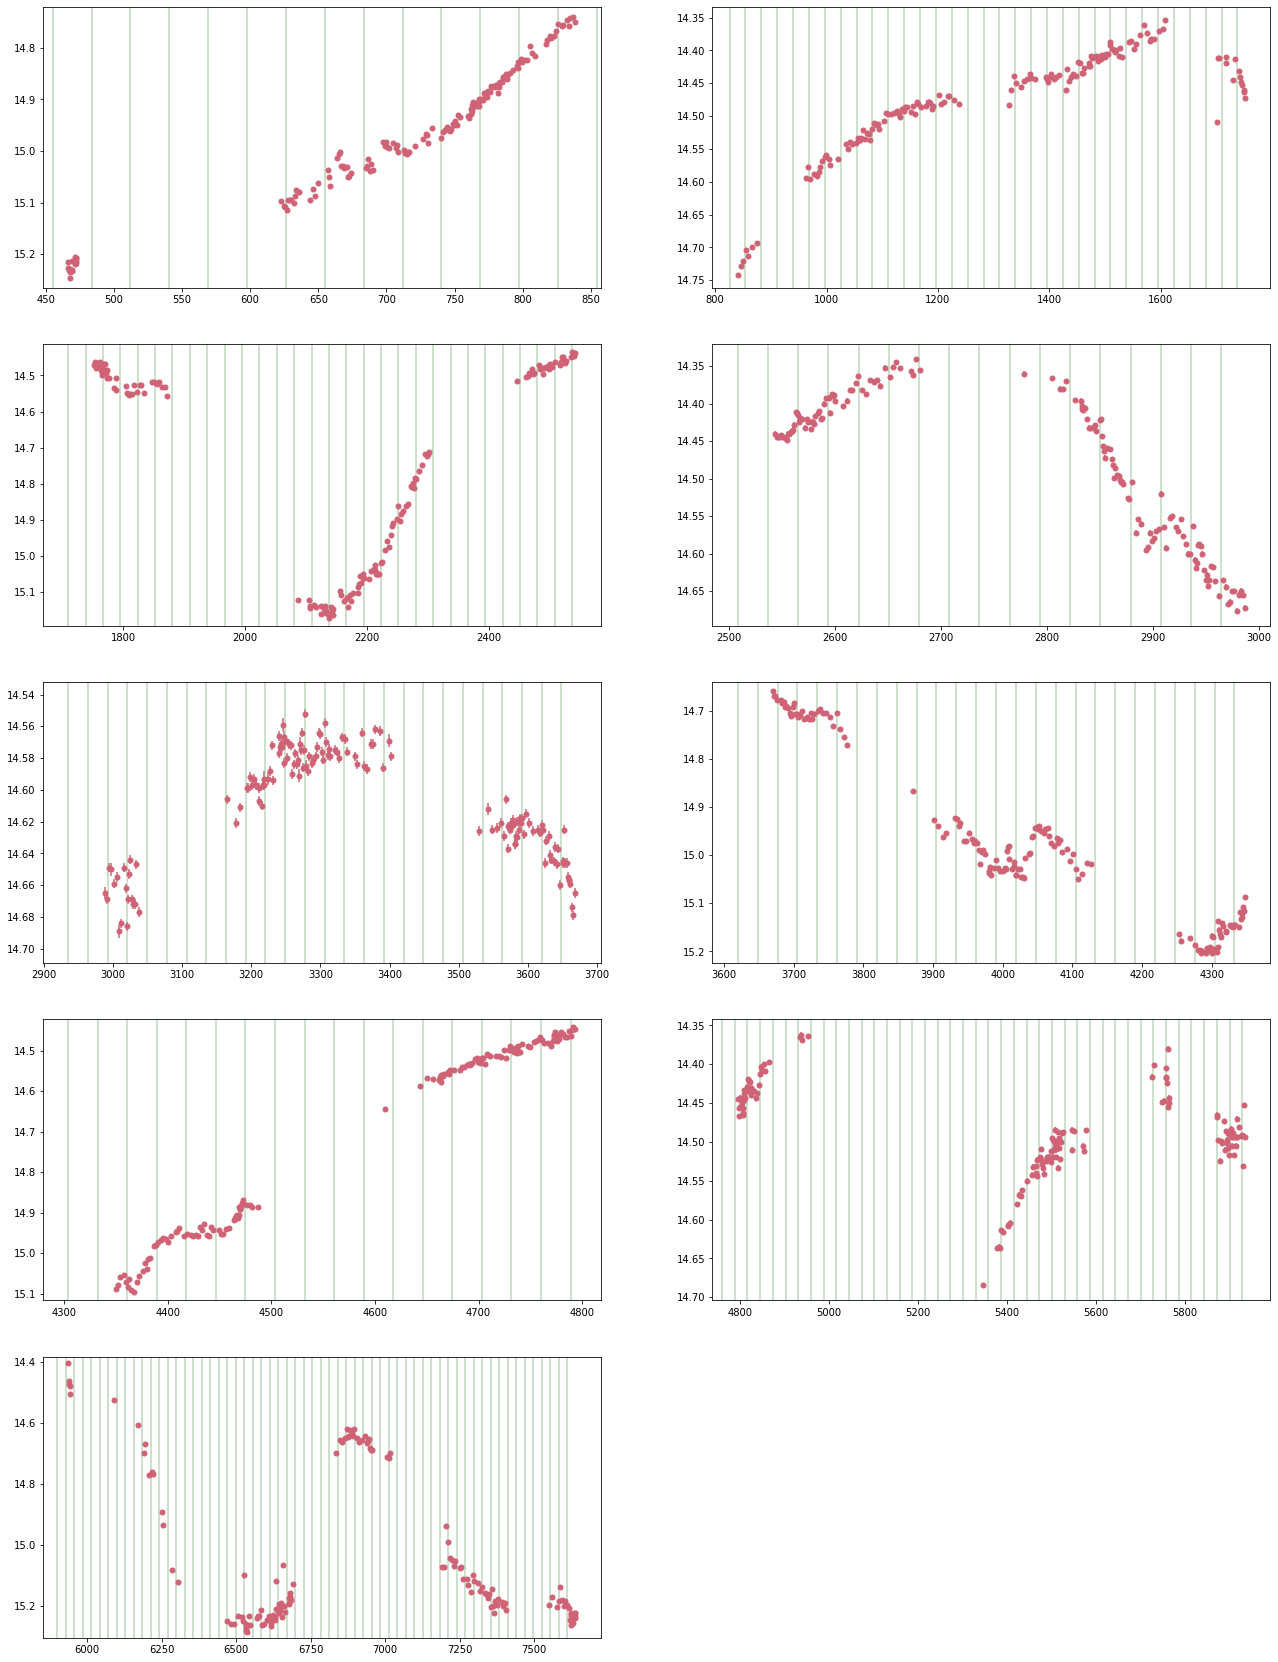

In [31]:
#list of inds to use -- easy to manipulate
#can also use finddense to not have large gaps, but then harder to control number of plots
inds = np.arange(0,len(iband),150)
orbsub(inds,span=False)

decent evidence for established period above but inconclusive

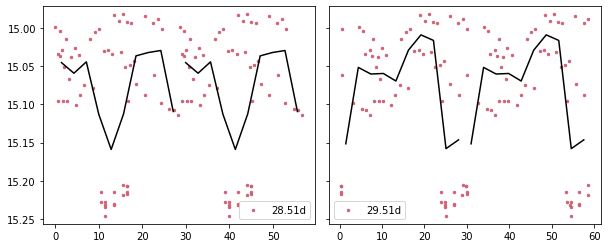

In [32]:
def checkpds(st,end,pd1=orb,pd2=orb+1,det=False,window=7,pbins=10):
    fig,ax = plt.subplots(1,2,figsize=(10,4),sharey=True)
    ttab = iband[st:end]
    if det:
        o.detrend(ttab,window=window)
        mag = ttab['I detrend']
    else: mag = ttab['I mag']
    days = ttab['MJD-50000']
    ax[0].scatter(days%pd1,mag,color=pink,label=str(pd1)+'d',s=6)
    ax[1].scatter(days%pd2,mag,color=pink,label=str(pd2)+'d',s=6)
    ax[0].scatter(pd1+days%pd1,mag,color=pink,s=6)
    ax[1].scatter(pd2+days%pd2,mag,color=pink,s=6)
    maxi,mini = np.max(mag),np.min(mag)
    ax[0].set_ylim(maxi+.01,mini-.01)
    plt.subplots_adjust(wspace=0.05)
    ax[0].legend()
    ax[1].legend()
    
    mid,avg = o.meanphase(ttab,pd1,det=det,pbins=pbins)
    ax[0].plot(mid,avg,color='black',label=str(pd)+'d')
    ax[0].plot(pd1+mid,avg,color='black')

    mid,avg = o.meanphase(ttab,pd2,det=det,pbins=pbins)
    ax[1].plot(mid,avg,color='black',label=str(pd2)+'d')
    ax[1].plot(pd2+mid,avg,color='black')
checkpds(0,60)

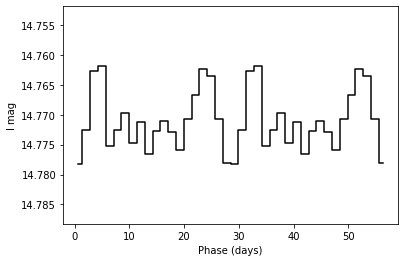

In [33]:
#changes a lot by binning
o.phasestep(iband,orb,20,det=True,med=False,double=True,color='black',err=False,retall=False,epoch=-5,label='')

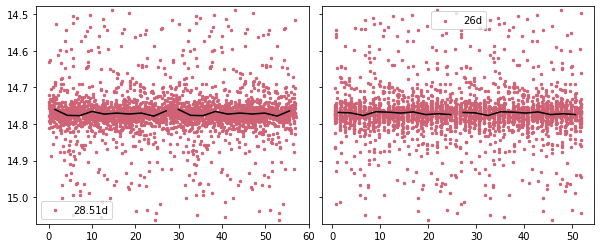

In [47]:
checkpds(0,-1,pd1=orb,pd2=26,det=True,window=41)

the established orbital period looks (pretty) good on the LC, but like with the periodograms, this section is pretty inconclusive. 
- how was the established period found?
- what else can be done to find the best period?

# 4: Look for Super-Orbital Period with Periodograms

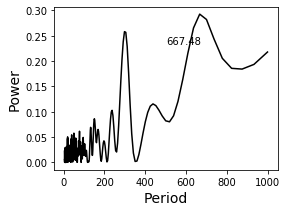

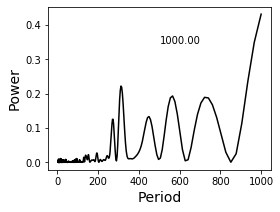

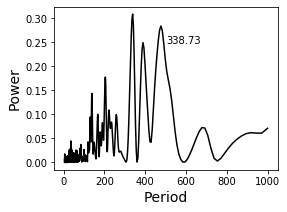

In [35]:
#each OGLE epoch
for i in ilist:
    o.periodogram(i,maxp=1000)


start ind: 0, end ind: -1


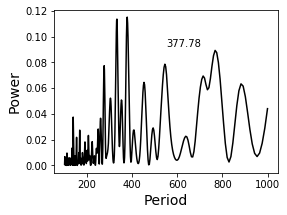

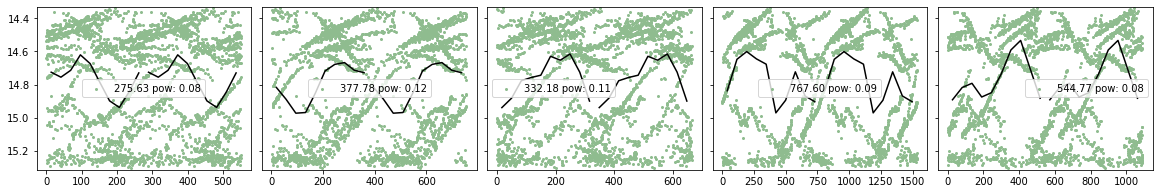

In [36]:
#full LC
df,pks = o.multiphase(iband,orb=orb,incl_orb=False,dense=False,minp=100,maxp=1000,plotpd=True)

start ind: 0, end ind: -1


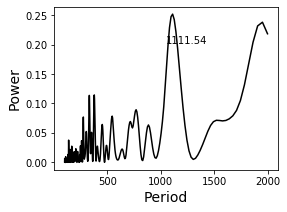

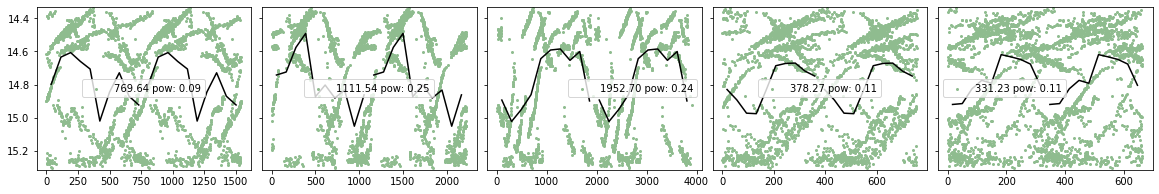

In [37]:
df,pks = o.multiphase(iband,orb=orb,incl_orb=False,dense=False,minp=100,maxp=2000,plotpd=True)

# 5: Look for Super-Orbital Period with LC

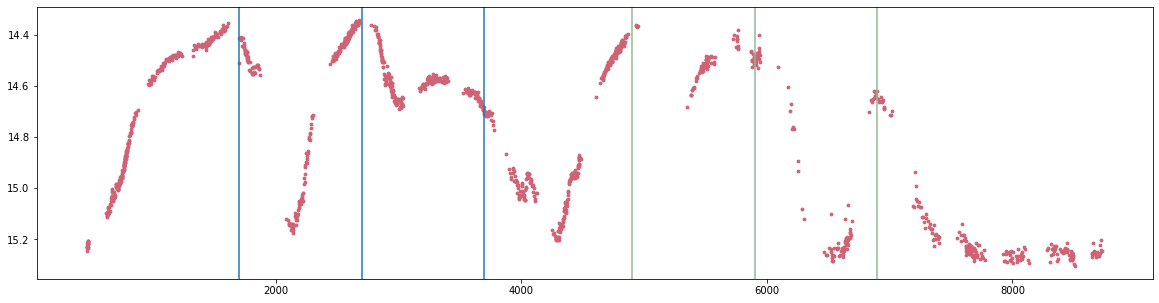

In [38]:
plt.figure(figsize=(20,5))
plt.scatter(idays,imag,color=pink,s=8)

maxi,mini = np.max(imag),np.min(imag)
plt.ylim(maxi+.05,mini-.05)

plt.axvline(1700)
plt.axvline(1700+1000)
plt.axvline(1700+2*1000)
# plt.axvline(1650+1000+700)
# plt.axvline(1650+3*1000)

plt.axvline(4900,color='darkseagreen')
plt.axvline(4900+1000,color='darkseagreen')
plt.axvline(4900+1000*2,color='darkseagreen')

# Add to Summary Table

In [39]:
#read in summary table
summ = pd.read_csv('summtab.csv')

In [40]:
#automatic additions
o.addtotable(iband,vband,summ,num,interp)

In [41]:
#grab row for source
row = summ[summ['src_n']==num]
row

,src_n,ra_deg,dec_deg,spin period,perr,est. period,sep,name,mean I,stdev I,...,redder when brighter,I V-I corr,V V-I corr,I V-I slope,I V-I int,V V-I slope,V V-I int,V-I transition,Type II amp,note
10,11,12.971667,-72.53,8.9,1.0,28.51,0.522347,NaN,14.771583,0.303708,...,check,-0.677279,-0.424519,-2.038015,14.753279,-1.038015,14.753279,NaN,NaN,NaN


In [51]:
summ.columns

Index(['src_n', 'ra_deg', 'dec_deg', 'spin period', 'perr', 'est. period',
       'sep', 'name', 'mean I', 'stdev I', 'max I', 'min I', 'I range',
       'mean V', 'stdev V', 'max V', 'min V', 'V range', 'est. period method',
       'best period', 'best superorbital', 'other period', 'period shape',
       'big dip', 'orbital cont', 'superorbital cont', 'mult superorbital',
       'changing superorbital amp', 'redder when brighter', 'I V-I corr',
       'V V-I corr', 'I V-I slope', 'I V-I int', 'V V-I slope', 'V V-I int',
       'V-I transition', 'Type II amp', 'note'],
      dtype='object')

In [52]:
#manual categorical additions
row['V-I transition'] = 'yes'
row['changing superorbital amp'] = 'yes' #not continuously but see last flare and then flat
#revisit values for period and superorbital
summ[summ['src_n']==num] = row

In [53]:
summ[summ['src_n']==num]

,src_n,ra_deg,dec_deg,spin period,perr,est. period,sep,name,mean I,stdev I,...,redder when brighter,I V-I corr,V V-I corr,I V-I slope,I V-I int,V V-I slope,V V-I int,V-I transition,Type II amp,note
10,11,12.971667,-72.53,8.9,1.0,28.51,0.522347,NaN,14.771583,0.303708,...,check,-0.677279,-0.424519,-2.038015,14.753279,-1.038015,14.753279,yes,NaN,NaN


In [54]:
#write out table
summ.to_csv('summtab.csv',index=False)